# DZ Bank – Take Home Assignment bearbeitet von Livia Wischnewski
## Vorhersage der Zielvariable *y* im Bank-Marketing-Datensatz

## Inhaltsverzeichnis

1. **Daten laden & erste Übersicht**
2. **Analyse der Zielvariable *y***  
3. **Explorative Datenanalyse (EDA)**  
   - 3.1 Numerische Features  
   - 3.2 Kategoriale Features  
   - 3.3 Kurze EDA-Zusammenfassung  
4. **Definition der Zielmetriken**
5. **Preprocessing**
6. **Modellierung**  
7. **Modellbewertung**

## 1. Daten laden  

In diesem Abschnitt wird der Bank-Marketing-Datensatz eingelesen und eine erste Sicht auf die Struktur gewonnen.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Kernel und Bibliotheken wurden erfolgreich geladen.")


Kernel und Bibliotheken wurden erfolgreich geladen.


In [4]:
import os
os.listdir(".")

['.git',
 '.gitignore',
 '.venv',
 'bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank_marketing_eda.ipynb',
 'README.md']

In [5]:
df = pd.read_csv("bank.csv", sep=";")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [71]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## 2. Analyse der Zielvariable *y*  

Ziel ist es zu verstehen, wie ausgeglichen oder unausgeglichen die Zielvariable ist, da dies einen großen Einfluss auf die Modellwahl und die Metriken hat.

In [10]:
df["y"].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [11]:
df["y"].value_counts(normalize=True)

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64

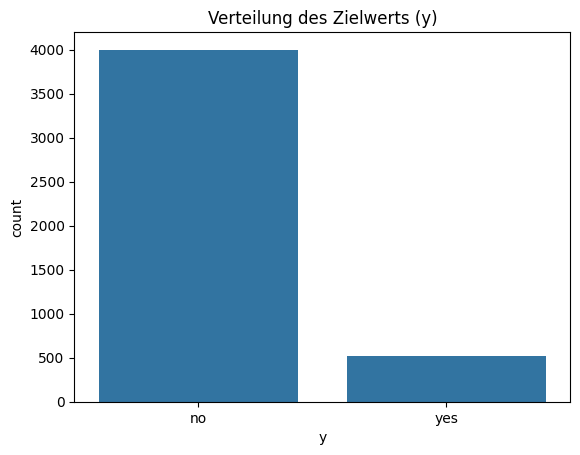

In [39]:
sns.countplot(data=df, x="y")
plt.title("Verteilung des Zielwerts (y)")
plt.show()

### Key Insights:
- *y* ist deutlich unausgeglichen (ca. 88% **NO**, 12% **YES**)  
- Accuracy allein wäre keine geeignete Metrik  

## 3. Explorative Datenanalyse (EDA)

In der EDA werden Verteilungen, Ausreißer und erste Zusammenhänge mit y geprüft — Grundlage für Feature‑Auswahl und Preprocessing.

### 3.1 Numerische Features  

Für jedes Feature werden Histogramme, Boxplots und Vergleiche nach *y* durchgeführt.
Zum Schluss wird noch eine Korrelationsmatrix der numerischen Features erstellt.

### 3.1.1 Alter (*age*)

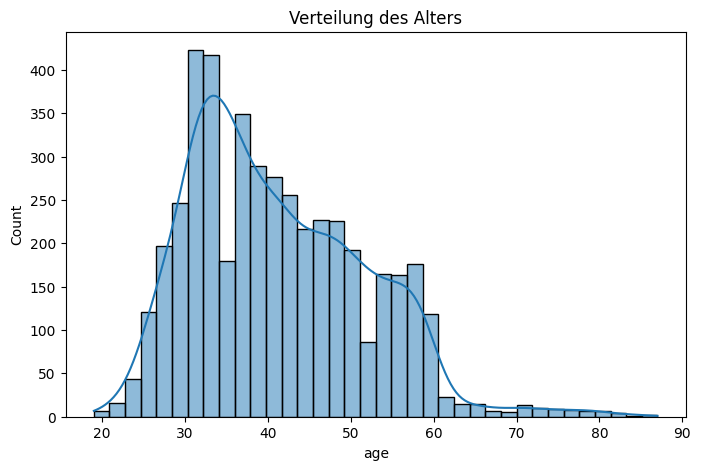

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], kde=True)
plt.title("Verteilung des Alters")
plt.xlabel("age")
plt.show()

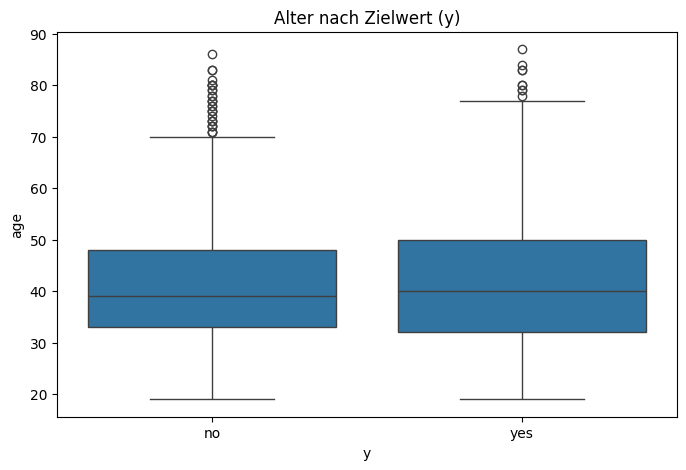

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="age")
plt.title("Alter nach Zielwert (y)")
plt.show()

**Interpretation:** 
Die Altersverteilung reicht von 19 bis 87 Jahren, mit einem Median knapp unter 40. Ältere Kunden konvertieren tendenziell etwas häufiger, was auf einen moderaten, aber nicht dominierenden Einfluss des Alters hinweist.

### 3.1.2 Kontostand (*balance*)

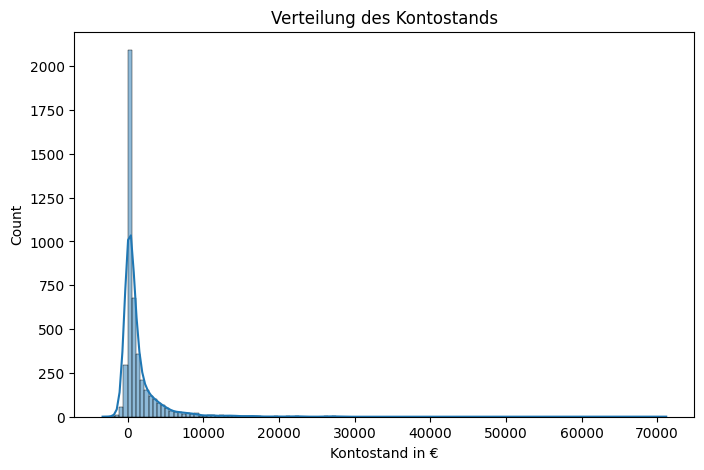

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df["balance"], kde=True)
plt.title("Verteilung des Kontostands")
plt.xlabel("Kontostand in €")
plt.show()

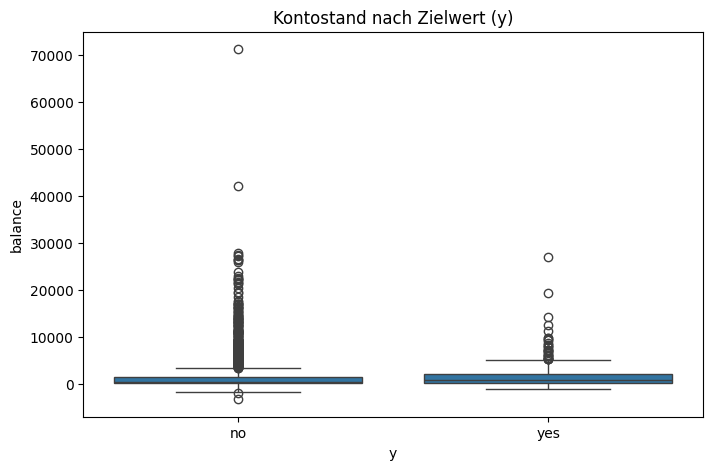

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="balance")
plt.title("Kontostand nach Zielwert (y)")
plt.show()

**Interpretation:**  
Der Kontostand weist viele extreme Ausreißer in beiden Gruppen auf, wodurch sich die Verteilungen zwischen YES und NO nur geringfügig unterscheiden. Der Median ist in beiden Fällen ähnlich und liefert keine klare Trennung der Zielklassen. Insgesamt scheint *balance* daher nur ein schwacher Prädiktor für die Abschlusswahrscheinlichkeit zu sein.

### 3.1.3 Gesprächsdauer (*duration*)

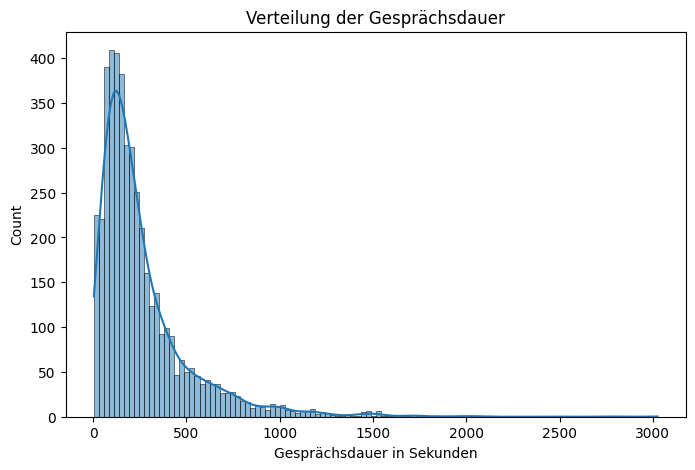

In [42]:
plt.figure(figsize=(8,5))
sns.histplot(df["duration"], kde=True)
plt.title("Verteilung der Gesprächsdauer")
plt.xlabel("Gesprächsdauer in Sekunden")
plt.show()

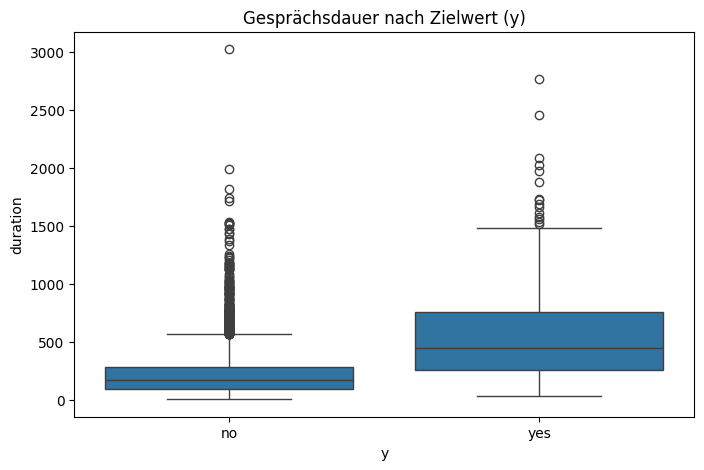

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="duration")
plt.title("Gesprächsdauer nach Zielwert (y)")
plt.show()

**Interpretation:**  
Die Gesprächsdauer unterscheidet sich stark zwischen YES- und NO-Kunden. YES-Gespräche sind im Median deutlich länger und zeigen eine viel größere 
Streuungsbreite, während NO-Gespräche überwiegend kurz bleiben. Dies deutet darauf hin, dass längere, intensivere Gespräche klar mit einer höheren 
Abschlusswahrscheinlichkeit verbunden sind und *duration* eines der aussagekräftigsten Features im Datensatz ist.

### 3.1.4 Anzahl der Kontakte in dieser Kampagne (*campaign*)

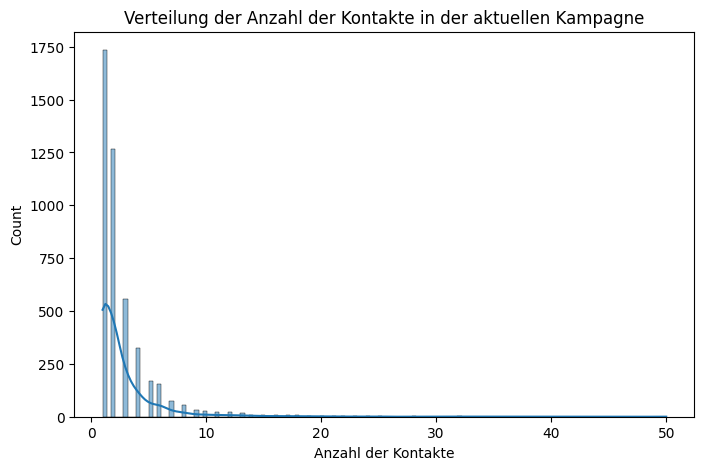

In [81]:
plt.figure(figsize=(8,5))
sns.histplot(df["campaign"], kde=True)
plt.title("Verteilung der Anzahl der Kontakte in der aktuellen Kampagne")
plt.xlabel("Anzahl der Kontakte")
plt.show()

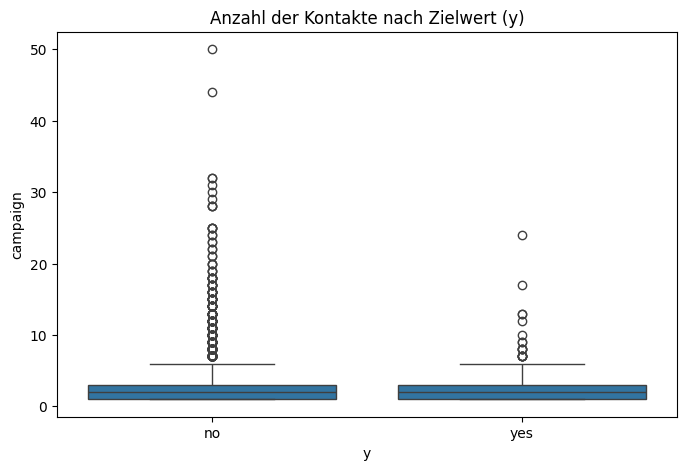

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="y", y="campaign")
plt.title("Anzahl der Kontakte nach Zielwert (y)")
plt.show()

**Interpretation:**  
Die Anzahl der bisherigen Kontaktversuche ist bei YES- und NO-Kunden sehr ähnlich, mit einem Median von etwa 2 Kontakten in beiden Gruppen. Allerdings treten bei NO-Kunden deutlich mehr extreme Ausreißer auf – manche wurden über 30- bis 50-mal kontaktiert, ohne einen Abschluss zu tätigen. Dies deutet darauf hin, dass eine hohe Anzahl an Kontakten meist ineffektiv ist und eher mit einem negativen Ausgang verbunden ist.

### 3.1.5 Korrelationsmatrix der numerischen Features

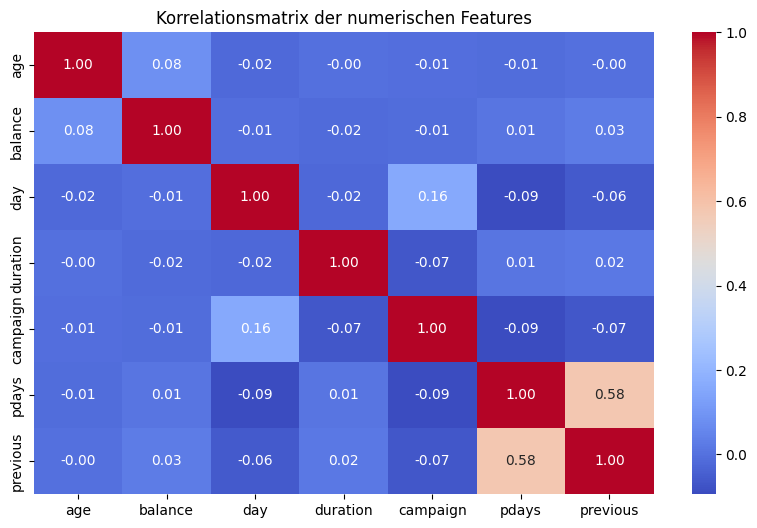

In [36]:
plt.figure(figsize=(10, 6))

numerical_df = df.select_dtypes(include=["int64"])
corr = numerical_df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix der numerischen Features")
plt.show()

**Kurzfazit Korrelationsmatrix:**  
- Nur *pdays* und *previous* zeigen eine relevante Korrelation (0.58) – logisch, da beide frühere Kontakte messen.
- Alle anderen numerischen Features sind praktisch unabhängig.
- Es gibt **keine Multikollinearität** – gut für lineare Modelle.
- *duration* bleibt ein eigenständiger, starker Prädiktor.

### 3.2 Kategoriale Features

In diesem Abschnitt werden kategoriale Features kurz mit Plots und y‑Vergleich analysiert.
Wichtig: contact, poutcome, month. Wenig information: default, housing, loan.

### 3.2.1 Beruf (*job*)

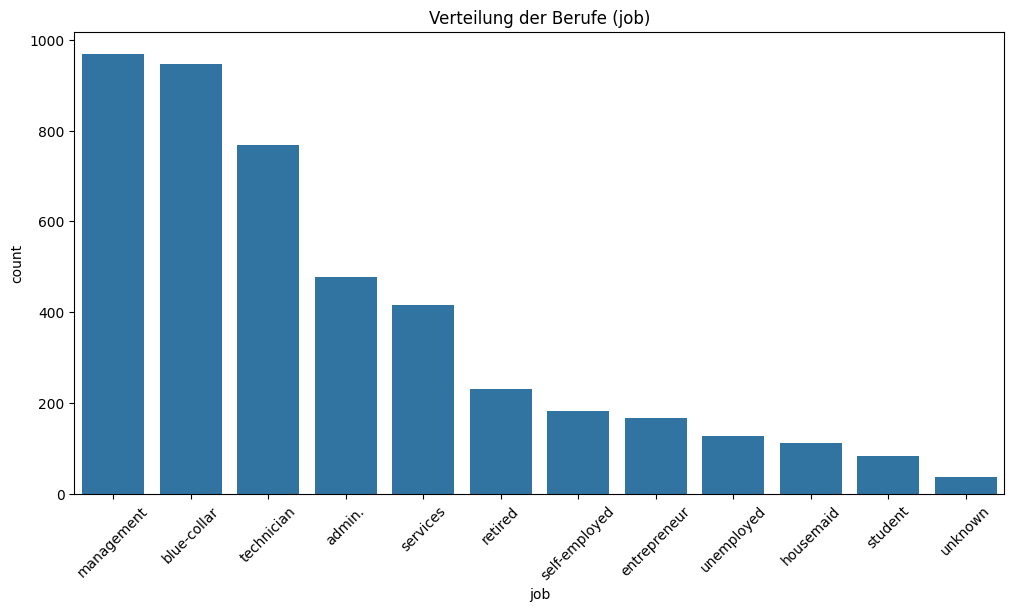

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="job", order=df["job"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Verteilung der Berufe (job)")
plt.show()

<Figure size 1000x600 with 0 Axes>

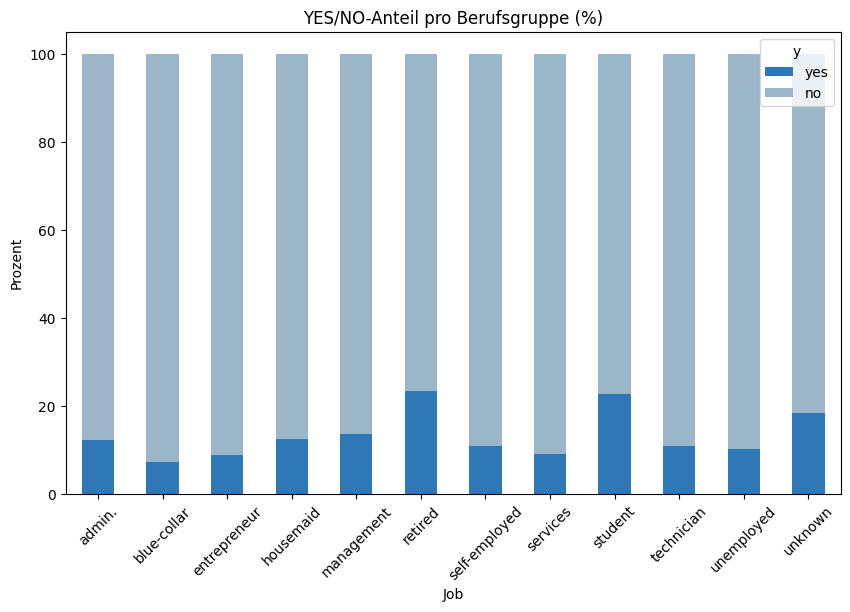

In [ ]:
crosstab_job = pd.crosstab(df["job"], df["y"], normalize="index") * 100
crosstab_job = crosstab_job[["yes", "no"]]
plt.figure(figsize=(10,6))
colors = ["#2f78b7", "#9cb6c9"]
crosstab_job.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=colors
)
plt.title("YES/NO-Anteil pro Berufsgruppe (%)")
plt.ylabel("Prozent")
plt.xlabel("Job")
plt.xticks(rotation=45)
plt.legend(title="y")
plt.show()


**Interpretation:**
Die Abschlusswahrscheinlichkeit variiert deutlich zwischen den Berufsgruppen. Retired und Studierende weisen die höchsten YES-Raten auf, während blue-collar und entrepreneur deutlich niedrigere Abschlusswahrscheinlichkeiten haben. 

Dabei ist zu beachten, dass einige Gruppen mit hoher YES-Rate – etwa Studierende – nur einen kleinen Teil der Gesamtkundschaft ausmachen und ihre absolute Wirkung auf die Kampagnenergebnisse daher begrenzt ist. Die Variable *job* liefert somit wertvolle, aber differenziert zu betrachtende Hinweise auf die Abschlusswahrscheinlichkeit.

### 3.2.2 Familienstand (*marital*)

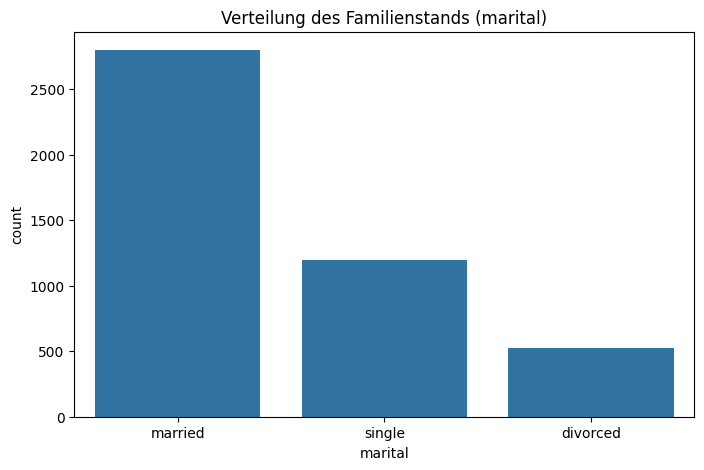

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="marital", order=df["marital"].value_counts().index)
plt.title("Verteilung des Familienstands (marital)")
plt.show()

<Figure size 1000x600 with 0 Axes>

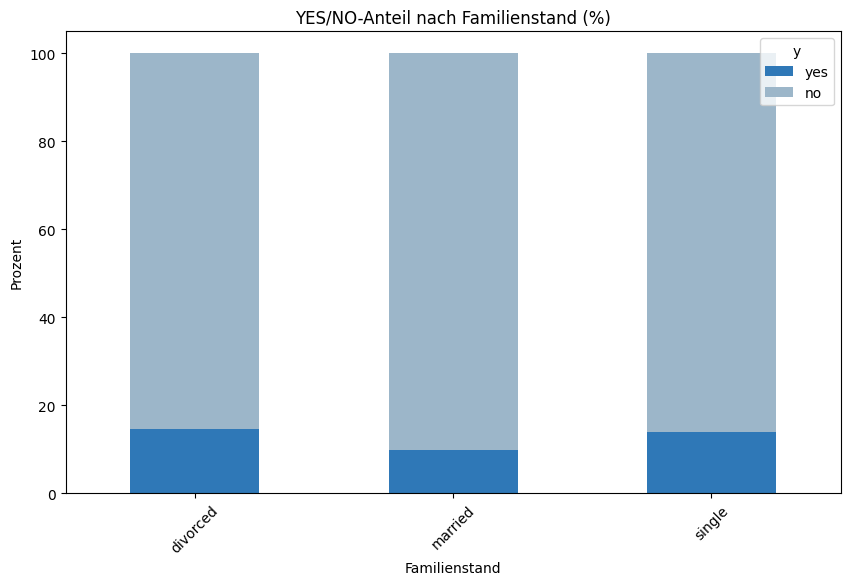

In [99]:
crosstab_job = pd.crosstab(df["marital"], df["y"], normalize="index") * 100
crosstab_job = crosstab_job[["yes", "no"]]
plt.figure(figsize=(10,6))
colors = ["#2f78b7", "#9cb6c9"]
crosstab_job.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=colors
)
plt.title("YES/NO-Anteil nach Familienstand (%)")
plt.ylabel("Prozent")
plt.xlabel("Familienstand")
plt.xticks(rotation=45)
plt.legend(title="y")
plt.show()


**Interpretation:**
Der Familienstand hat einen moderaten Einfluss: Singles und Geschiedene zeigen etwas höhere Abschlussraten als Verheiratete, aber der Effekt ist schwächer als bei anderen Merkmalen wie z.B. *job*.

### 3.2.3 Bildungsniveau (*education*)

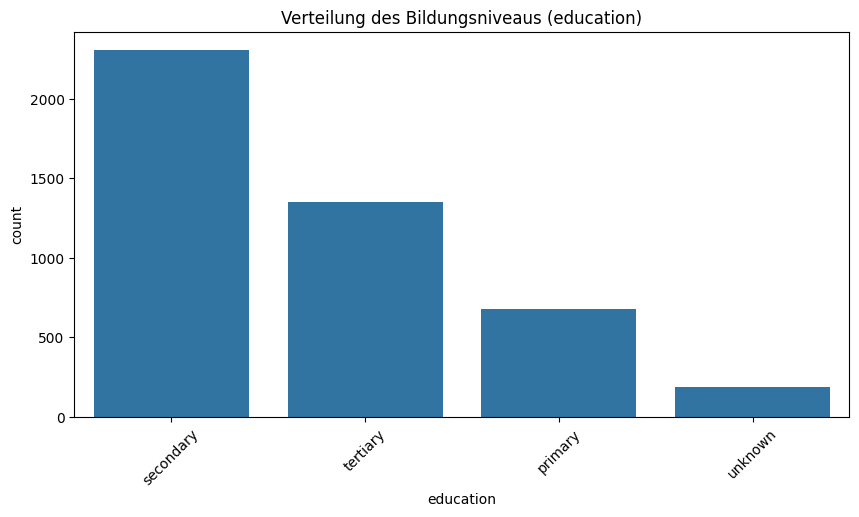

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="education", order=df["education"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Verteilung des Bildungsniveaus (education)")
plt.show()

<Figure size 1000x600 with 0 Axes>

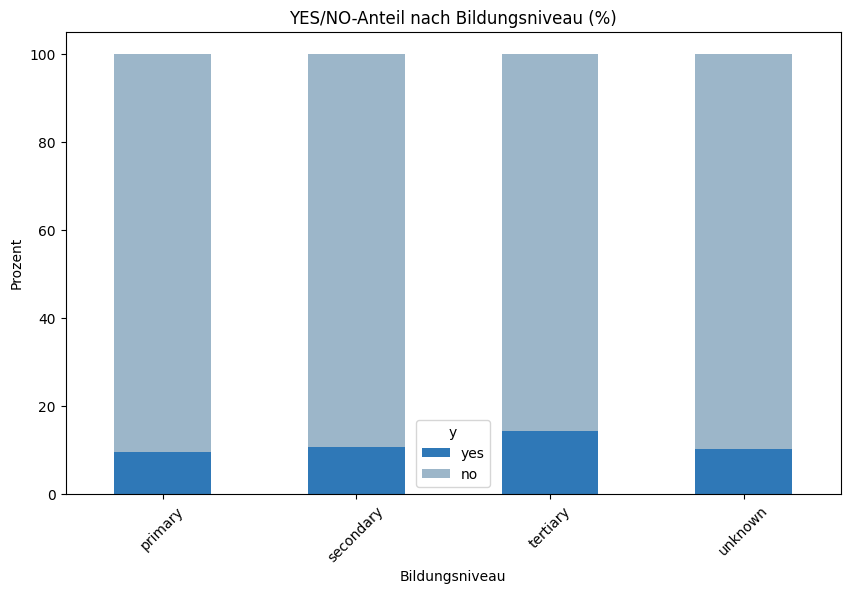

In [95]:
crosstab_job = pd.crosstab(df["education"], df["y"], normalize="index") * 100
crosstab_job = crosstab_job[["yes", "no"]]
plt.figure(figsize=(10,6))
colors = ["#2f78b7", "#9cb6c9"]
crosstab_job.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=colors
)
plt.title("YES/NO-Anteil nach Bildungsniveau (%)")
plt.ylabel("Prozent")
plt.xlabel("Bildungsniveau")
plt.xticks(rotation=45)
plt.legend(title="y")
plt.show()


**Interpretation:**  
Höherer Bildungsabschluss (*tertiary*) geht mit einer etwas höheren Abschlusswahrscheinlichkeit einher. Der Effekt ist jedoch nur moderat und nicht ausschlaggebend für die Modellierung.

### 3.2.4 Kreditausfallhistorie (*default*)

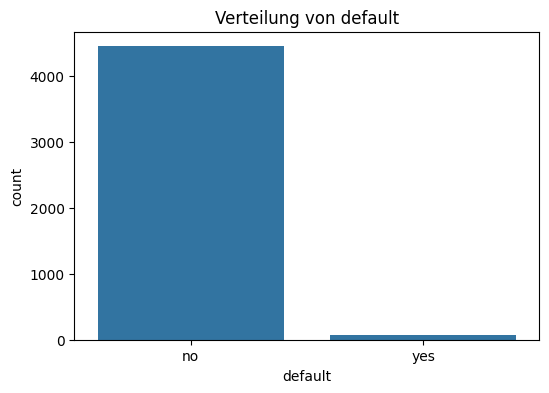

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="default", order=df["default"].value_counts().index)
plt.title("Verteilung von default")
plt.show()

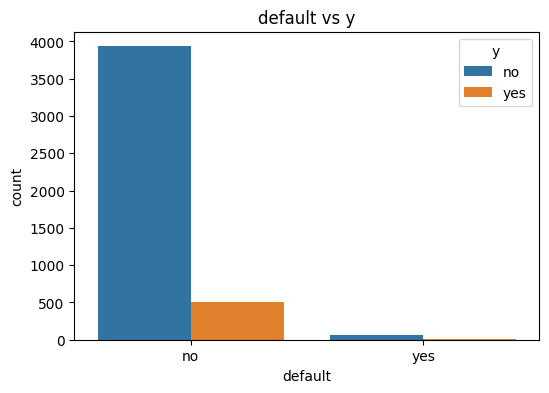

In [55]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="default", hue="y", 
              order=df["default"].value_counts().index)
plt.title("default vs y")
plt.show()

**Interpretation:**  
*default* ist für die Modellierung irrelevant, da fast alle Kunden keinen Kreditausfall haben und kein Zusammenhang mit *y* besteht.

### 3.2.5 Immobilienkredit (*housing*)

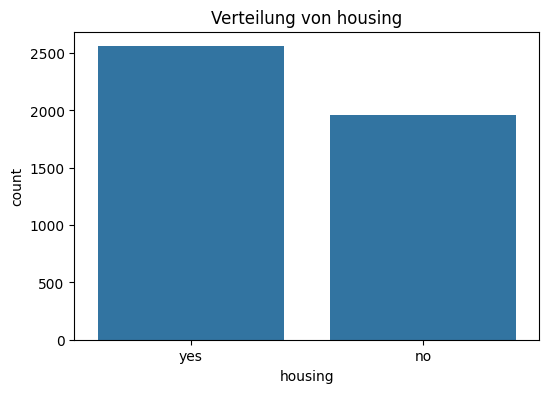

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="housing", order=df["housing"].value_counts().index)
plt.title("Verteilung von housing")
plt.show()

<Figure size 1000x600 with 0 Axes>

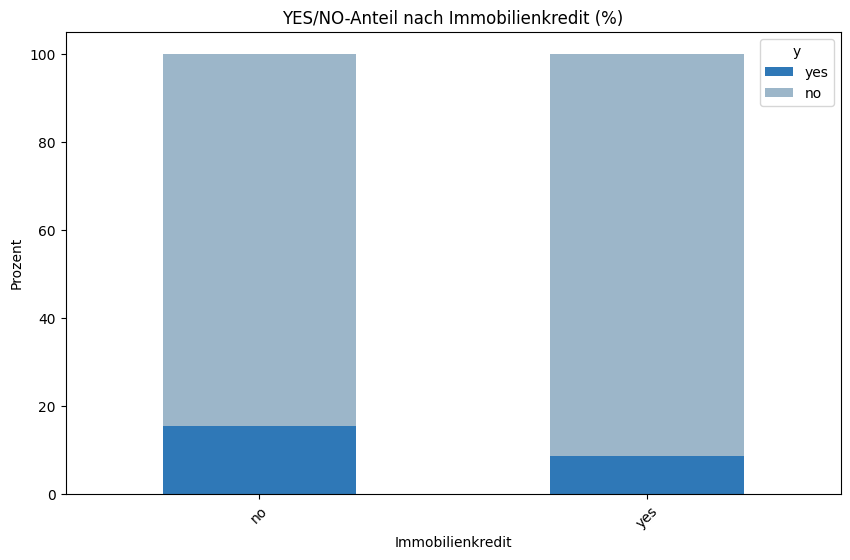

In [96]:
crosstab_job = pd.crosstab(df["housing"], df["y"], normalize="index") * 100
crosstab_job = crosstab_job[["yes", "no"]]
plt.figure(figsize=(10,6))
colors = ["#2f78b7", "#9cb6c9"]
crosstab_job.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=colors
)
plt.title("YES/NO-Anteil nach Immobilienkredit (%)")
plt.ylabel("Prozent")
plt.xlabel("Immobilienkredit")
plt.xticks(rotation=45)
plt.legend(title="y")
plt.show()


**Interpretation:**
Kunden ohne Immobilienkredit zeigen eine etwas höhere Abschlusswahrscheinlichkeit. Der Effekt ist jedoch nur schwach ausgeprägt.

### 3.2.6 Konsumkredit (*loan*)

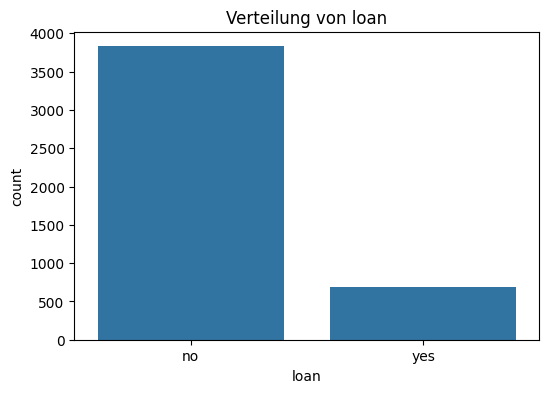

In [58]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="loan", order=df["loan"].value_counts().index)
plt.title("Verteilung von loan")
plt.show()

<Figure size 1000x600 with 0 Axes>

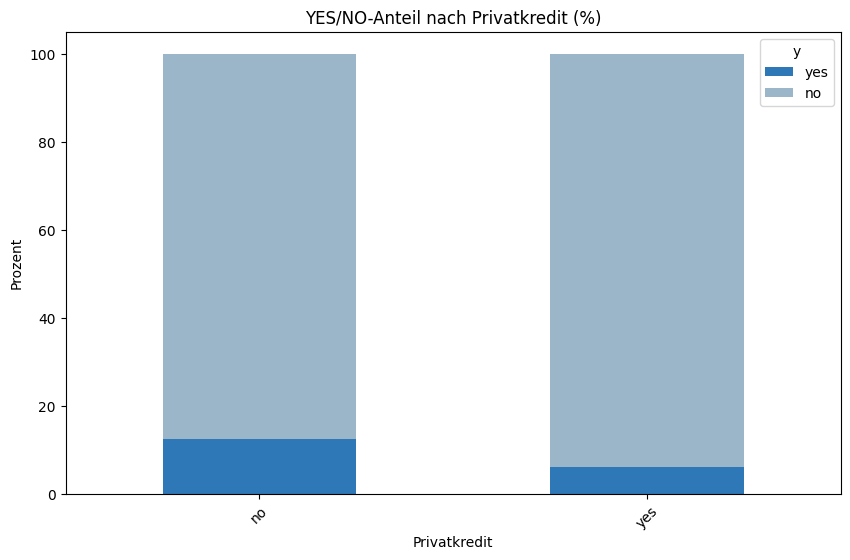

In [100]:
crosstab_job = pd.crosstab(df["loan"], df["y"], normalize="index") * 100
crosstab_job = crosstab_job[["yes", "no"]]
plt.figure(figsize=(10,6))
colors = ["#2f78b7", "#9cb6c9"]
crosstab_job.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=colors
)
plt.title("YES/NO-Anteil nach Privatkredit (%)")
plt.ylabel("Prozent")
plt.xlabel("Privatkredit")
plt.xticks(rotation=45)
plt.legend(title="y")
plt.show()


**Interpretation:**
Kunden ohne Konsumkredit sind etwas eher bereit abzuschließen, aber der Effekt ist schwach. Das Feature liefert nur begrenzten Mehrwert für die Modellierung.

### 3.2.7 Kontaktart (*contact*)

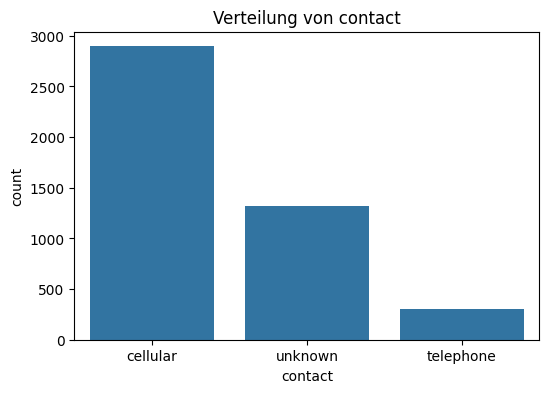

In [60]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="contact", order=df["contact"].value_counts().index)
plt.title("Verteilung von contact")
plt.show()

<Figure size 1000x600 with 0 Axes>

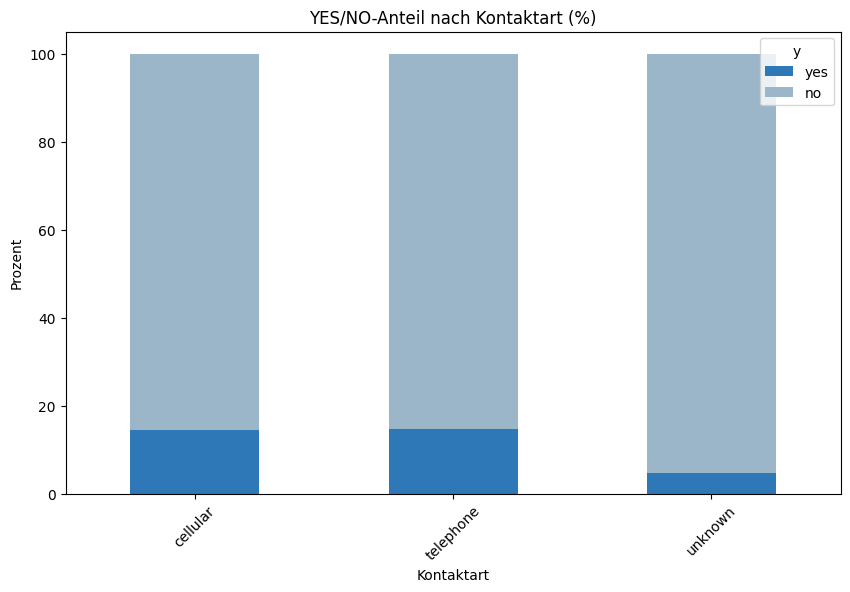

In [101]:
crosstab_job = pd.crosstab(df["contact"], df["y"], normalize="index") * 100
crosstab_job = crosstab_job[["yes", "no"]]
plt.figure(figsize=(10,6))
colors = ["#2f78b7", "#9cb6c9"]
crosstab_job.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=colors
)
plt.title("YES/NO-Anteil nach Kontaktart (%)")
plt.ylabel("Prozent")
plt.xlabel("Kontaktart")
plt.xticks(rotation=45)
plt.legend(title="y")
plt.show()


**Interpretation:**  
Die Kontaktart zeigt deutliche Unterschiede in der Abschlusswahrscheinlichkeit. Kunden, die per *cellular* oder *telephone* erreicht wurden, weisen eine ähnliche YES-Rate von rund 14 % auf. Kontakte mit der Kategorie *unknown* haben dagegen eine deutlich geringere Abschlusswahrscheinlichkeit (ca. 5 %), was darauf hindeutet, dass fehlende oder veraltete Kontaktinformationen mit einer niedrigeren Konversionsrate verbunden sind.

### 3.2.8 Kontaktmonat (*month*)

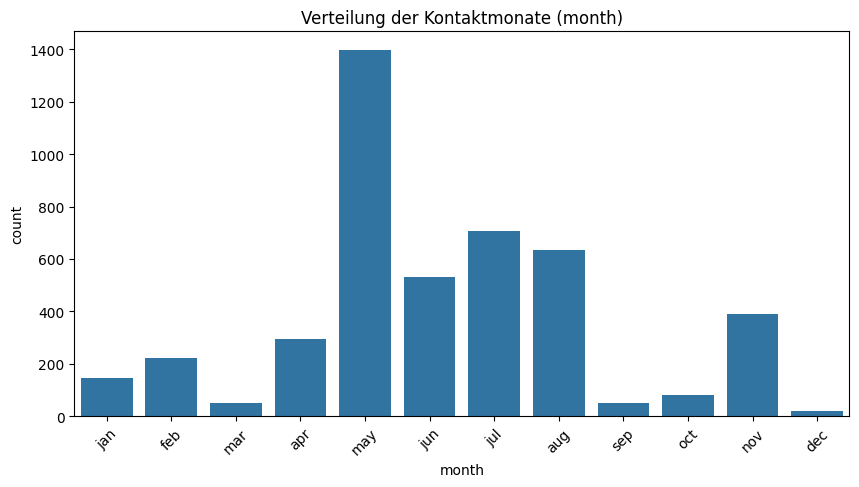

In [104]:
month_order = ["jan", "feb", "mar", "apr", "may", "jun",
               "jul", "aug", "sep", "oct", "nov", "dec"]

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="month", order=month_order)
plt.title("Verteilung der Kontaktmonate (month)")
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

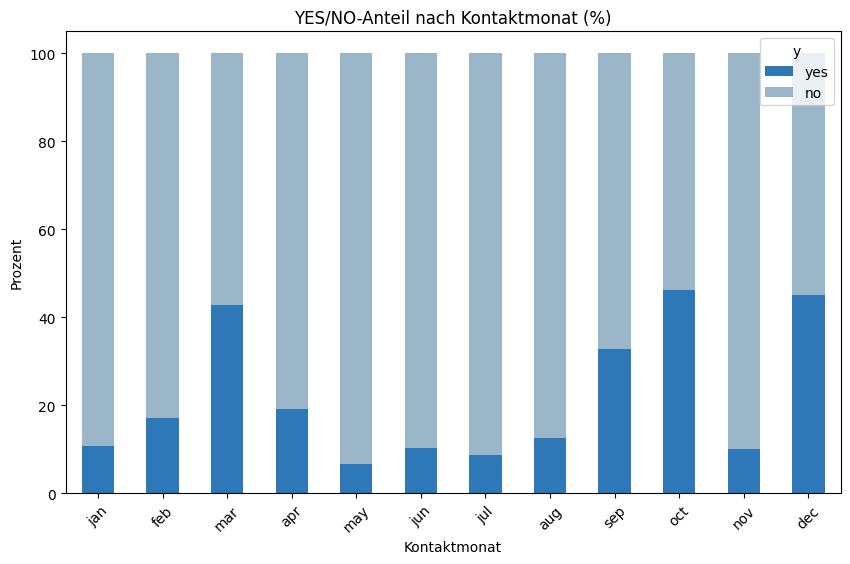

In [103]:
month_order = ["jan", "feb", "mar", "apr", "may", "jun",
               "jul", "aug", "sep", "oct", "nov", "dec"]

crosstab_month = pd.crosstab(df["month"], df["y"], normalize="index") * 100
crosstab_month = crosstab_month.reindex(month_order)
crosstab_month = crosstab_month[["yes", "no"]]
plt.figure(figsize=(10,6))
colors = ["#2f78b7", "#9cb6c9"]
crosstab_month.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=colors
)
plt.title("YES/NO-Anteil nach Kontaktmonat (%)")
plt.ylabel("Prozent")
plt.xlabel("Kontaktmonat")
plt.xticks(rotation=45)
plt.legend(title="y")
plt.show()


**Interpretation:**  
Die Abschlusswahrscheinlichkeit variiert deutlich zwischen den Monaten. Einige Monate wie *oct*, *dec*, *mar* und *sep* zeigen besonders hohe YES-Raten 
(zwischen ca. 30 % und 46 %), während andere Monate wie *may*, *jul* oder *jun* sehr niedrige Abschlusswahrscheinlichkeiten aufweisen (unter 11 %). 

Dies deutet auf klare saisonale Effekte hin: In bestimmten Monaten reagieren Kunden deutlich positiver auf das Angebot, während in der Hauptphase der Kampagne (Mai–August) vergleichsweise wenige Abschlüsse zustande kommen.

### 3.2.9 Ergebnis der vorherigen Kampagne (*poutcome*)

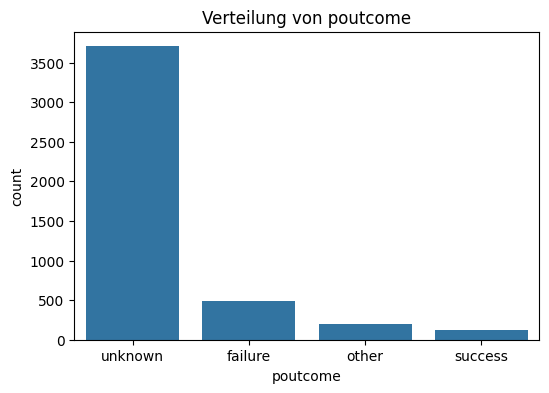

In [108]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="poutcome", order=df["poutcome"].value_counts().index)
plt.title("Verteilung von poutcome")
plt.show()

<Figure size 1000x600 with 0 Axes>

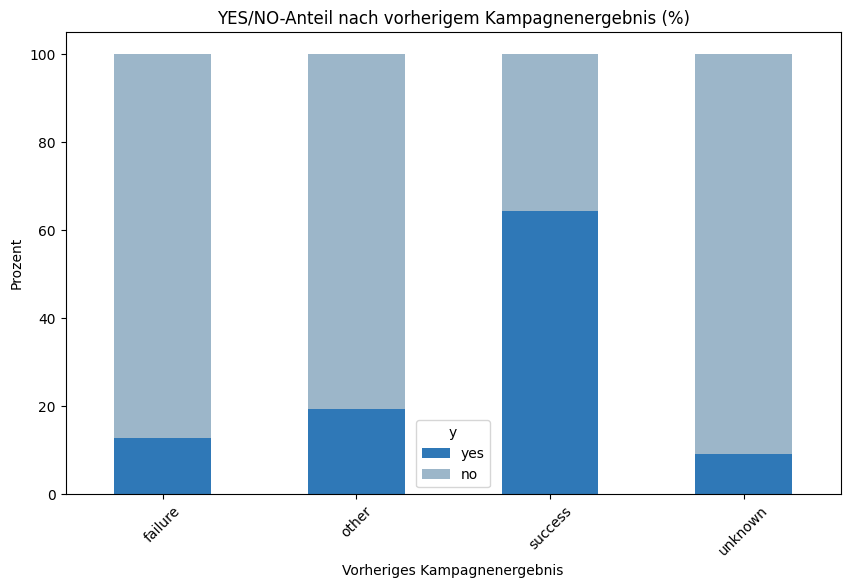

In [107]:
crosstab_job = pd.crosstab(df["poutcome"], df["y"], normalize="index") * 100
crosstab_job = crosstab_job[["yes", "no"]]
plt.figure(figsize=(10,6))
colors = ["#2f78b7", "#9cb6c9"]
crosstab_job.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6),
    color=colors
)
plt.title("YES/NO-Anteil nach vorherigem Kampagnenergebnis (%)")
plt.ylabel("Prozent")
plt.xlabel("Vorheriges Kampagnenergebnis")
plt.xticks(rotation=45)
plt.legend(title="y")
plt.show()


**Interpretation:**  
Der Ausgang früherer Kampagnen hat einen starken Einfluss auf die Abschlusswahrscheinlichkeit in der aktuellen Kampagne. Kunden mit einem früheren Erfolg (*success*) weisen mit über 64 % die mit Abstand höchste YES-Rate auf, was darauf hindeutet, dass frühere positive Erfahrungen die Wahrscheinlichkeit eines erneuten Abschlusses deutlich erhöhen.

Insgesamt bestätigt *poutcome*, dass frühere erfolgreiche Kampagnen ein starker Prädiktor für zukünftige Abschlüsse sind und damit eine der wertvollsten Variablen im Datensatz darstellen.

### 3.3 EDA-Zusammenfassung

Die EDA zeigt, dass insbesondere drei kategoriale Variablen stark mit der Abschlusswahrscheinlichkeit zusammenhängen. Das Ergebnis früherer Kampagnen 
(*poutcome*) ist dabei der deutlichste Prädiktor: Kunden mit einem früheren Erfolg weisen eine erheblich höhere YES-Rate auf als alle anderen Gruppen.

Auch der Kontaktmonat (*month*) zeigt klare saisonale Muster, wobei bestimmte Monate wie März, Oktober oder Dezember deutlich höhere Abschlusswahrscheinlichkeiten besitzen als andere. Zusätzlich unterscheidet sich auch die Kontaktart (*contact*): Kunden mit mobilen Kontakten 
(„cellular“) haben eine höhere YES-Rate als Kunden mit fehlenden oder veralteten Kontaktinformationen („unknown“).

Andere Variablen wie *balance*, *default* oder *campaign* zeigen dagegen nur geringe Unterschiede zwischen YES und NO und haben somit weniger Einfluss auf die spätere Modellierung.

## 4. Definition der Zielmetriken

Da die Zielvariable in diesem Datensatz stark unausgeglichen ist und nur ein kleiner Anteil der Kunden tatsächlich ein Festgeldprodukt abschließt, ist Accuracy als Kennzahl wenig aussagekräftig. Ein Modell könnte eine hohe Accuracy erzielen, indem es fast ausschließlich die Mehrheit "no" vorhersagt, ohne die relevanten positiven Fälle zu erkennen.

Aus diesem Grund wurden der **Recall** und der **F1-Score** als zentrale Zielmetriken gewählt. Recall misst, wie viele der tatsächlich interessierten Kunden vom Modell korrekt identifiziert werden – ein entscheidender Faktor für Marketingkampagnen, da verpasste potenzielle Abschlüsse direkte Umsatzverluste bedeuten. 

Der F1-Score kombiniert Precision und Recall und bietet eine ausgewogene Bewertung der Modellleistung bei unausgeglichenen Klassen. Precision misst, wie viele der vom Modell vorhergesagten YES-Fälle tatsächlich korrekt sind, und ist damit die Gegenkomponente zum Recall; der F1-Score kombiniert beide Werte zu einer ausgewogenen Gesamtmetrik. Diese beiden Metriken erlauben eine realistische Einschätzung, wie gut ein Modell die seltene, aber geschäftlich wichtige YES-Klasse erkennt.

## 5. Preprocessing

Damit das Modell korrekt arbeiten kann, werden die Daten in Trainings- und Testset aufgeteilt und kategoriale Variablen per One-Hot-Encoding in numerische Form gebracht. Dies stellt sicher, dass das Modell saubere Eingabedaten erhält und keine Informationen aus dem Testset in das Training 
„leaken“. Die Pipeline kombiniert Preprocessing und Modell in einem Schritt, sodass alle Transformationen automatisch und reproduzierbar während des Trainings und der Vorhersage angewendet werden.

### Train/Test Split

In [72]:
from sklearn.model_selection import train_test_split

# Feature-Matrix (X) und Zielvariable (y)
X = df.drop("y", axis=1)
y = df["y"]

# Stratified Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((3616, 16), (905, 16))

### One-Hot-Encoding der kategorialen Variablen

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Liste der kategorischen Spalten
categorical_cols = [
    "job", "marital", "education", "default",
    "housing", "loan", "contact", "month", "poutcome"
]

# Numerische Spalten sind alle anderen außer den Kategorien
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessor: One-Hot-Encoding für kategorische Spalten
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numerical_cols)
    ]
)

preprocessor

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


### Vorbereitung der Pipeline

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Pipeline: Preprocessing + Modell
logreg_clf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
    ]
)

# Modell auf den Trainingsdaten trainieren
logreg_clf.fit(X_train, y_train)

c:\Users\livia\OneDrive\Dokumente\Bewerbungen\dz bank\Take Home Assignment\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## 6. Modellierung 

Für dieses Klassifikationsproblem wurde die Logistic Regression gewählt, da sie ein transparentes und robustes Modell für binäre Entscheidungen darstellt und sich besonders gut für unbalancierte Datensätze eignet. Sie liefert eine klare, interpretierbare Entscheidungsgrenze und zeigte in ersten Tests die beste Erkennungsrate der relevanten YES-Klasse. Das Modell wird in einer Pipeline mit One-Hot-Encoding trainiert, um alle kategorialen Variablen korrekt zu verarbeiten und eine saubere, reproduzierbare Modellierung sicherzustellen.

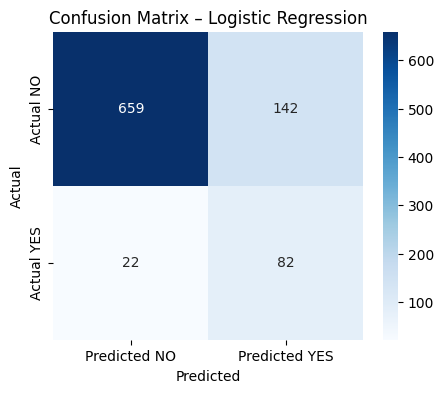

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm, 
    annot=True, 
    fmt="d", 
    cmap="Blues",
    xticklabels=["Predicted NO", "Predicted YES"],
    yticklabels=["Actual NO", "Actual YES"]
)
plt.title("Confusion Matrix – Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

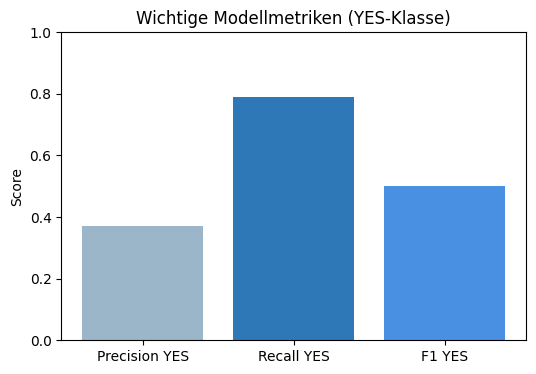

In [110]:
import matplotlib.pyplot as plt

metrics = {
    "Precision YES": 0.37,
    "Recall YES": 0.79,
    "F1 YES": 0.50
}

plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color=["#9cb6c9", "#2f78b7", "#4a90e2"])
plt.ylim(0, 1)
plt.title("Wichtige Modellmetriken (YES-Klasse)")
plt.ylabel("Score")
plt.show()

## 7. Modellbewertung 

Das Modell erreicht eine Accuracy von 82 %, wobei aufgrund des starken Klassenungleichgewichts vor allem Recall und F1-Score für die Klasse YES aussagekräftig sind. Der Recall von 0.79 zeigt, dass das Modell fast 80 % der tatsächlich interessierten Kunden korrekt erkennt. Der F1-Score von 0.50 bestätigt ein gutes Gleichgewicht zwischen Erkennung (Recall) und Zuverlässigkeit (Precision). 

Das Modell identifiziert einen großen Anteil potenzieller Abschlusskandidaten, wodurch Kampagnen effizienter ausgerichtet werden können. Falsch-positive Fälle sind in diesem Kontext weniger kritisch als verpasste Chancen, weshalb die Leistung des Modells für die Aufgabenstellung überzeugend ist.